In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, GRU

In [2]:
# 2. Đọc file csv và gắng index với giá Close
df = pd.read_csv('NVL-Historical-Data.csv')

In [3]:
# Xử lý dữ liệu trong cột Price
df['Price'] = df['Price'].str.replace(',', '').astype(float)

In [4]:
# Thiết lập index
df1=df.reset_index()['Price']

In [5]:
# 3. Scaler data
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))

In [6]:
# 3. Chia train test 7_3
train_size_7_3 = int(0.7 * len(df1))
test_size_7_3 = len(df1) - train_size_7_3

train_data_7_3 = df1[:train_size_7_3]
test_data_7_3 = df1[train_size_7_3:]

In [7]:
# 3. Chia train test 8_2
train_size_8_2 = int(0.8 * len(df1))
test_size_8_2 = len(df1) - train_size_8_2

train_data_8_2 = df1[:train_size_8_2]
test_data_8_2 = df1[train_size_8_2:]

In [8]:
# 3. Chia train test 9_1
train_size_9_1 = int(0.9 * len(df1))
test_size_9_1 = len(df1) - train_size_9_1

train_data_9_1= df1[:train_size_9_1]
test_data_9_1 = df1[train_size_9_1:]

In [9]:
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset) - time_step - 1):
		a = dataset[i:(i + time_step)]
		dataX.append(a)
		dataY.append(dataset[i + time_step])
	return np.array(dataX), np.array(dataY)


In [11]:
# 4. Reshape into X=t,t+1,t+2..t+99 and Y=t+100 _7_3
time_step = 100
X_train_7_3, y_train_7_3 = create_dataset(train_data_7_3, time_step)
X_test_7_3, y_test_7_3 = create_dataset(test_data_7_3, time_step)

# Reshape dữ liệu cho phù hợp với mạng GRU
X_train_7_3 = X_train_7_3.reshape(X_train_7_3.shape[0], X_train_7_3.shape[1], 1)
X_test_7_3 = X_test_7_3.reshape(X_test_7_3.shape[0], X_test_7_3.shape[1], 1)

In [14]:
# 4. Reshape into X=t,t+1,t+2..t+99 and Y=t+100 _8_2
time_step = 100
X_train_8_2, y_train_8_2 = create_dataset(train_data_8_2, time_step)
X_test_8_2, y_test_8_2 = create_dataset(test_data_8_2, time_step)

# Reshape dữ liệu cho phù hợp với mạng GRU
X_train_8_2 = X_train_8_2.reshape(X_train_8_2.shape[0], X_train_8_2.shape[1], 1)
X_test_8_2 = X_test_8_2.reshape(X_test_8_2.shape[0], X_test_8_2.shape[1], 1)

In [15]:
# 4. Reshape into X=t,t+1,t+2..t+99 and Y=t+100 _9_1
time_step = 100
X_train_9_1, y_train_9_1 = create_dataset(train_data_9_1, time_step)
X_test_9_1, y_test_9_1 = create_dataset(test_data_9_1, time_step)

# Reshape dữ liệu cho phù hợp với mạng GRU
X_train_9_1 = X_train_9_1.reshape(X_train_9_1.shape[0], X_train_9_1.shape[1], 1)
X_test_9_1 = X_test_9_1.reshape(X_test_9_1.shape[0], X_test_9_1.shape[1], 1)

In [16]:
# 5. Define GRU Model

model_7_3 = Sequential()
model_7_3.add(GRU(64, input_shape=(time_step, 1)))
model_7_3.add(Dense(1))
model_7_3.compile(optimizer='adam', loss='mean_squared_error')
model_8_2 = Sequential()
model_8_2.add(GRU(64, input_shape=(time_step, 1)))
model_8_2.add(Dense(1))
model_8_2.compile(optimizer='adam', loss='mean_squared_error')
model_9_1 = Sequential()
model_9_1.add(GRU(64, input_shape=(time_step, 1)))
model_9_1.add(Dense(1))
model_9_1.compile(optimizer='adam', loss='mean_squared_error')

In [17]:
# 6. Fit mô hình với dữ liệu train
model_7_3.fit(X_train_7_3, y_train_7_3, epochs=50, batch_size=64, verbose=1)


Epoch 1/50
19/19 [==============================] - 4s 45ms/step - loss: 0.1044
Epoch 2/50
19/19 [==============================] - 1s 45ms/step - loss: 0.0160
Epoch 3/50
19/19 [==============================] - 1s 54ms/step - loss: 0.0067
Epoch 4/50
19/19 [==============================] - 1s 47ms/step - loss: 0.0018
Epoch 5/50
19/19 [==============================] - 1s 51ms/step - loss: 5.0122e-04
Epoch 6/50
19/19 [==============================] - 1s 53ms/step - loss: 3.6659e-04
Epoch 7/50
19/19 [==============================] - 1s 51ms/step - loss: 3.3369e-04
Epoch 8/50
19/19 [==============================] - 1s 46ms/step - loss: 3.3627e-04
Epoch 9/50
19/19 [==============================] - 1s 57ms/step - loss: 3.1792e-04
Epoch 10/50
19/19 [==============================] - 1s 72ms/step - loss: 3.0917e-04
Epoch 11/50
19/19 [==============================] - 1s 75ms/step - loss: 3.0351e-04
Epoch 12/50
19/19 [==============================] - 1s 44ms/step - loss: 2.9904e-04
Epoch

In [18]:
model_8_2.fit(X_train_8_2, y_train_8_2, epochs=50, batch_size=64, verbose=1)


Epoch 1/50
21/21 [==============================] - 4s 73ms/step - loss: 0.0316
Epoch 2/50
21/21 [==============================] - 2s 90ms/step - loss: 0.0035
Epoch 3/50
21/21 [==============================] - 2s 73ms/step - loss: 9.2261e-04
Epoch 4/50
21/21 [==============================] - 2s 101ms/step - loss: 2.8640e-04
Epoch 5/50
21/21 [==============================] - 2s 99ms/step - loss: 2.5074e-04
Epoch 6/50
21/21 [==============================] - 3s 119ms/step - loss: 2.3775e-04
Epoch 7/50
21/21 [==============================] - 2s 105ms/step - loss: 2.3065e-04
Epoch 8/50
21/21 [==============================] - 2s 89ms/step - loss: 2.2922e-04
Epoch 9/50
21/21 [==============================] - 2s 90ms/step - loss: 2.1965e-04
Epoch 10/50
21/21 [==============================] - 1s 56ms/step - loss: 2.1593e-04
Epoch 11/50
21/21 [==============================] - 1s 46ms/step - loss: 2.1184e-04
Epoch 12/50
21/21 [==============================] - 1s 54ms/step - loss: 2.067

In [19]:
model_9_1.fit(X_train_9_1, y_train_9_1, epochs=50, batch_size=64, verbose=1)

Epoch 1/50
24/24 [==============================] - 4s 51ms/step - loss: 0.0692
Epoch 2/50
24/24 [==============================] - 1s 49ms/step - loss: 0.0082
Epoch 3/50
24/24 [==============================] - 1s 45ms/step - loss: 0.0013
Epoch 4/50
24/24 [==============================] - 1s 54ms/step - loss: 5.7539e-04
Epoch 5/50
24/24 [==============================] - 1s 55ms/step - loss: 5.0050e-04
Epoch 6/50
24/24 [==============================] - 1s 62ms/step - loss: 4.6495e-04
Epoch 7/50
24/24 [==============================] - 2s 88ms/step - loss: 4.4592e-04
Epoch 8/50
24/24 [==============================] - 2s 66ms/step - loss: 4.3776e-04
Epoch 9/50
24/24 [==============================] - 1s 49ms/step - loss: 4.1759e-04
Epoch 10/50
24/24 [==============================] - 1s 52ms/step - loss: 4.0529e-04
Epoch 11/50
24/24 [==============================] - 1s 45ms/step - loss: 3.7844e-04
Epoch 12/50
24/24 [==============================] - 1s 53ms/step - loss: 3.6960e-04
E

In [20]:
# 10. Dự báo dữ liệu test và train _7_3
train_predict_7_3 = model_7_3.predict(X_train_7_3)
y_pred_7_3 = model_7_3.predict(X_test_7_3)

14/14 [==============================] - 0s 11ms/step


In [21]:
# 10. Dự báo dữ liệu test và train _8_2
train_predict_8_2 = model_8_2.predict(X_train_8_2)
y_pred_8_2 = model_8_2.predict(X_test_8_2)

9/9 [==============================] - 0s 17ms/step


In [22]:
# 10. Dự báo dữ liệu test và train _9_1
train_predict_9_1 = model_9_1.predict(X_train_9_1)
y_pred_9_1 = model_9_1.predict(X_test_9_1)

3/3 [==============================] - 0s 11ms/step


In [23]:
# 11. Chuẩn hóa dữ liệu y_pred, _7_3
train_predict_7_3 = scaler.inverse_transform(train_predict_7_3)
y_pred_7_3 = scaler.inverse_transform(y_pred_7_3)

In [24]:
# 11. Chuẩn hóa dữ liệu y_pred, _8_2
train_predict_8_2 = scaler.inverse_transform(train_predict_8_2)
y_pred_8_2 = scaler.inverse_transform(y_pred_8_2)

In [25]:
# 11. Chuẩn hóa dữ liệu y_pred, _9_1
train_predict_9_1 = scaler.inverse_transform(train_predict_9_1)
y_pred_9_1 = scaler.inverse_transform(y_pred_9_1)

In [26]:
# 13. Dự báo 30 ngày tiếp theo
x_input_7_3 = test_data_7_3[-100:].reshape(1, -1)
temp_input_7_3 = list(x_input_7_3[0])
lst_output_7_3 = []

i = 0
while(i < 30):
    if len(temp_input_7_3) > 100:
        x_input_7_3 = np.array(temp_input_7_3[1:])  # Lấy từng ngày từ ngày thứ 2 trở đi
        x_input_7_3 = x_input_7_3.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_7_3 = model_7_3.predict(x_input_7_3, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_7_3.extend(yhat_7_3[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        temp_input_7_3 = temp_input_7_3[1:]  # Loại bỏ ngày đầu tiên
        lst_output_7_3.extend(yhat_7_3.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1
    else:
        x_input_7_3 = x_input_7_3.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_7_3 = model_7_3.predict(x_input_7_3, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_7_3.extend(yhat_7_3[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        lst_output_7_3.extend(yhat_7_3.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1

# In ra dự đoán cho 30 ngày tiếp theo
print("Dự đoán giá cho 30 ngày tiếp theo:")
print(lst_output_7_3)

Dự đoán giá cho 30 ngày tiếp theo:
[[0.07726171612739563], [0.07745891809463501], [0.0776740238070488], [0.07789218425750732], [0.07810993492603302], [0.07832638174295425], [0.07854116708040237], [0.07875414937734604], [0.07896526157855988], [0.0791744813323021], [0.07938182353973389], [0.07958726584911346], [0.07979085296392441], [0.07999258488416672], [0.08019249141216278], [0.0803905799984932], [0.08058684319257736], [0.08078133314847946], [0.0809740424156189], [0.08116499334573746], [0.08135423064231873], [0.08154171705245972], [0.08172750473022461], [0.08191162347793579], [0.08209405094385147], [0.08227483928203583], [0.08245399594306946], [0.08263149112462997], [0.08280741423368454], [0.08298173546791077]]


In [27]:
x_input_8_2 = test_data_8_2[-100:].reshape(1, -1)
temp_input_8_2 = list(x_input_8_2[0])
lst_output_8_2 = []

i = 0
while(i < 30):
    if len(temp_input_8_2) > 100:
        x_input_8_2 = np.array(temp_input_8_2[1:])  # Lấy từng ngày từ ngày thứ 2 trở đi
        x_input_8_2 = x_input_8_2.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_8_2 = model_8_2.predict(x_input_8_2, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_8_2.extend(yhat_8_2[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        temp_input_8_2 = temp_input_8_2[1:]  # Loại bỏ ngày đầu tiên
        lst_output_8_2.extend(yhat_8_2.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1
    else:
        x_input_8_2 = x_input_8_2.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_8_2 = model_8_2.predict(x_input_8_2, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_8_2.extend(yhat_8_2[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        lst_output_8_2.extend(yhat_8_2.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1

# In ra dự đoán cho 30 ngày tiếp theo
print("Dự đoán giá cho 30 ngày tiếp theo:")
print(lst_output_8_2)


Dự đoán giá cho 30 ngày tiếp theo:
[[0.07580091059207916], [0.07536862045526505], [0.07490944862365723], [0.07443903386592865], [0.07396408915519714], [0.07348761707544327], [0.0730108916759491], [0.0725344717502594], [0.0720585361123085], [0.07158322632312775], [0.07110856473445892], [0.070634625852108], [0.070161372423172], [0.06968884915113449], [0.06921704858541489], [0.06874597072601318], [0.06827564537525177], [0.06780604273080826], [0.06733720749616623], [0.06686908006668091], [0.06640171259641647], [0.06593509018421173], [0.06546920537948608], [0.06500406563282013], [0.06453968584537506], [0.0640760213136673], [0.06361312419176102], [0.06315097957849503], [0.06268957257270813], [0.06222893297672272]]


In [28]:
x_input_9_1 = test_data_9_1[-100:].reshape(1, -1)
temp_input_9_1 = list(x_input_9_1[0])
lst_output_9_1 = []

i = 0
while(i < 30):
    if len(temp_input_9_1) > 100:
        x_input_9_1 = np.array(temp_input_9_1[1:])  # Lấy từng ngày từ ngày thứ 2 trở đi
        x_input_9_1 = x_input_9_1.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_9_1 = model_9_1.predict(x_input_9_1, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_9_1.extend(yhat_9_1[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        temp_input_9_1 = temp_input_9_1[1:]  # Loại bỏ ngày đầu tiên
        lst_output_9_1.extend(yhat_9_1.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1
    else:
        x_input_9_1 = x_input_9_1.reshape(1, time_step, 1)  # Reshape lại để phù hợp với input của mạng
        yhat_9_1 = model_9_1.predict(x_input_9_1, verbose=0)  # Dự đoán giá cho ngày tiếp theo
        temp_input_9_1.extend(yhat_9_1[0].tolist())  # Thêm dự đoán vào danh sách temp_input
        lst_output_9_1.extend(yhat_9_1.tolist())  # Lưu dự đoán vào mảng lst_output
        i += 1

# In ra dự đoán cho 30 ngày tiếp theo
print("Dự đoán giá cho 30 ngày tiếp theo:")
print(lst_output_9_1)


Dự đoán giá cho 30 ngày tiếp theo:
[[0.07458086311817169], [0.0739634558558464], [0.07310184836387634], [0.07211902737617493], [0.07106475532054901], [0.0699630007147789], [0.0688270628452301], [0.06766491383314133], [0.06648173928260803], [0.06528101861476898], [0.06406527757644653], [0.0628364086151123], [0.06159580498933792], [0.06034461408853531], [0.059083666652441025], [0.05781368538737297], [0.05653519928455353], [0.05524864047765732], [0.053954388946294785], [0.052652690559625626], [0.051343806087970734], [0.05002788454294205], [0.048705101013183594], [0.047375552356243134], [0.04603935405611992], [0.04469657689332962], [0.04334729164838791], [0.04199155047535896], [0.04062940552830696], [0.039260901510715485]]


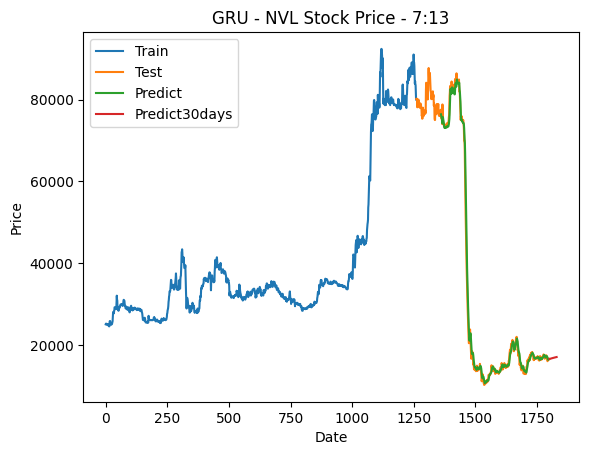

In [38]:
train_data_index_7_3 = pd.RangeIndex(start=0, stop=len(train_data_7_3), step=1)
plt.plot(train_data_index_7_3, scaler.inverse_transform(train_data_7_3), label='Train')

test_data_index_7_3 = pd.RangeIndex(start=train_size_7_3, stop=train_size_7_3+len(test_data_7_3), step=1)
plt.plot(test_data_index_7_3, scaler.inverse_transform(test_data_7_3), label='Test')

predicted_test_index_7_3 = pd.RangeIndex(start=train_size_7_3+time_step, stop=train_size_7_3+len(y_pred_7_3)+time_step, step=1)
plt.plot(predicted_test_index_7_3, y_pred_7_3, label='Predicted Test')

future_index_7_3 = pd.RangeIndex(start=test_data_index_7_3[-1]+1, stop=test_data_index_7_3[-1]+31, step=1)
plt.plot(future_index_7_3, scaler.inverse_transform(lst_output_7_3), label='Predicted 30 days')

plt.title('GRU - NVL Stock Price - 7:13')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()

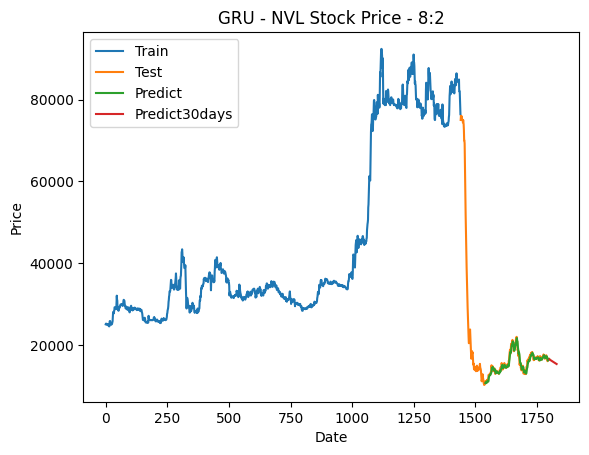

In [39]:
# Assume train_data_8_2, test_data_8_2, y_pred_8_2, lst_output_8_2, and train_size_8_2 are already defined

# Train data index
train_data_index_8_2 = pd.RangeIndex(start=0, stop=len(train_data_8_2), step=1)
plt.plot(train_data_index_8_2, scaler.inverse_transform(train_data_8_2), label='Train')

# Test data index
test_data_index_8_2 = pd.RangeIndex(start=train_size_8_2, stop=train_size_8_2+len(test_data_8_2), step=1)
plt.plot(test_data_index_8_2, scaler.inverse_transform(test_data_8_2), label='Test')

# Predicted test data index
predicted_test_index_8_2 = pd.RangeIndex(start=train_size_8_2+time_step, stop=train_size_8_2+len(y_pred_8_2)+time_step, step=1)
plt.plot(predicted_test_index_8_2, y_pred_8_2, label='Predicted Test')

# Future predictions index
future_index_8_2 = pd.RangeIndex(start=test_data_index_8_2[-1]+1, stop=test_data_index_8_2[-1]+31, step=1)
plt.plot(future_index_8_2, scaler.inverse_transform(lst_output_8_2), label='Predicted 30 days')

# Plot details
plt.title('GRU - NVL Stock Price - 8:2')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train','Test','Predict','Predict30days'])
plt.show()


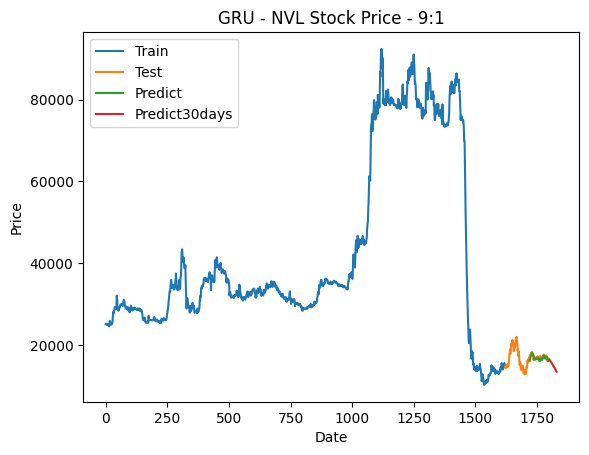

In [40]:
# Assume train_data_9_1, test_data_9_1, y_pred_9_1, lst_output_9_1, and train_size_9_1 are already defined

# Train data index
train_data_index_9_1 = pd.RangeIndex(start=0, stop=len(train_data_9_1), step=1)
plt.plot(train_data_index_9_1, scaler.inverse_transform(train_data_9_1), label='Train')

# Test data index
test_data_index_9_1 = pd.RangeIndex(start=train_size_9_1, stop=train_size_9_1 + len(test_data_9_1), step=1)
plt.plot(test_data_index_9_1, scaler.inverse_transform(test_data_9_1), label='Test')

# Predicted test data index
predicted_test_index_9_1 = pd.RangeIndex(start=train_size_9_1 + time_step, stop=train_size_9_1 + len(y_pred_9_1) + time_step, step=1)
plt.plot(predicted_test_index_9_1, y_pred_9_1, label='Predicted Test')

# Future predictions index
future_index_9_1 = pd.RangeIndex(start=test_data_index_9_1[-1] + 1, stop=test_data_index_9_1[-1] + 31, step=1)
plt.plot(future_index_9_1, scaler.inverse_transform(lst_output_9_1), label='Predicted 30 days')

# Plot details
plt.title('GRU - NVL Stock Price - 9:1')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend(['Train', 'Test', 'Predict', 'Predict30days'])
plt.show()
